In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle
from scipy.stats import sem


import matplotx
import numpy as np
import pandas as pd

from gptchem.plotsettings import * 

%matplotlib inline

In [3]:
all_res = glob("out/**/*.pkl")

In [4]:
all_res

['out/20230205_181812/summary.pkl',
 'out/20230207_231442/summary.pkl',
 'out/20230205_122152/summary.pkl',
 'out/20230205_193510/summary.pkl',
 'out/20230207_100603/summary.pkl',
 'out/20230210_043446/summary.pkl',
 'out/20230210_055149/summary.pkl',
 'out/20230201_191443/summary.pkl',
 'out/20230208_142001/summary.pkl',
 'out/20230206_030833/summary.pkl',
 'out/20230208_014348/summary.pkl',
 'out/20230207_020433/summary.pkl',
 'out/20230205_123216/summary.pkl',
 'out/20230206_224735/summary.pkl',
 'out/20230206_134740/summary.pkl',
 'out/20230207_134727/summary.pkl',
 'out/20230205_140056/summary.pkl',
 'out/20230207_032008/summary.pkl',
 'out/20230211_100800/summary.pkl',
 'out/20230210_011850/summary.pkl',
 'out/20230206_215541/summary.pkl',
 'out/20230205_163455/summary.pkl',
 'out/20230205_153006/summary.pkl',
 'out/20230208_031423/summary.pkl',
 'out/20230205_200856/summary.pkl']

In [5]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    num_points = loaded["train_size"]

    metrics = {
        "num_train_points": loaded["train_size"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
        "target": loaded["target"],
    }

    compiled_res.append(metrics)

    gpr_metrics = {
        "num_train_points": loaded["train_size"],
        "mae": loaded["baseline"]['xgb_metrics']["mean_absolute_error"],
        "max_error": loaded["baseline"]['xgb_metrics']["max_error"],
        "mse": loaded["baseline"]['xgb_metrics']["mean_squared_error"],
                "target": loaded["target"],
    }

    compiled_gpr.append(gpr_metrics)

In [6]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [7]:
compiled_res

,num_train_points,mae,max_error,mse,target
0,50,0.895925,3.494637,1.271837,"(logKH_CO2, CO2 Henry coefficient)"
1,20,1.022721,3.869490,1.840816,"(logKH_CO2, CO2 Henry coefficient)"
2,10,NaN,NaN,NaN,"(logKH_CH4, CH4 Henry coefficient)"
3,100,0.401663,3.127951,0.328874,"(logKH_CH4, CH4 Henry coefficient)"
4,200,0.844188,4.078015,1.277903,"(logKH_CO2, CO2 Henry coefficient)"
5,1000,0.319848,1.664489,0.185667,"(logKH_CH4, CH4 Henry coefficient)"
6,1000,0.334091,1.829350,0.202126,"(logKH_CH4, CH4 Henry coefficient)"
7,10,NaN,NaN,NaN,"(logKH_CH4, CH4 Henry coefficient)"
8,500,0.819581,4.279287,1.138667,"(logKH_CO2, CO2 Henry coefficient)"
9,200,NaN,NaN,NaN,"(logKH_CH4, CH4 Henry coefficient)"


In [8]:
compiled_grouped_res = compiled_res.groupby(["target", "num_train_points",]).agg(["mean", "std", sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _va

In [9]:
compiled_gpr_grouped = compiled_gpr.groupby(["target", "num_train_points"]).agg(["mean", "std", sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _va

In [10]:
compiled_gpr_grouped

mae            \
                                                         mean       std   
target                             num_train_points                       
(logKH_CH4, CH4 Henry coefficient) 10                5.393689  0.010422   
                                   20                3.674495       NaN   
                                   50                1.077419       NaN   
                                   100               0.432989       NaN   
                                   200               2.543246       NaN   
                                   500               2.182982  0.022109   
                                   1000              1.947232  0.033180   
(logKH_CO2, CO2 Henry coefficient) 10                4.042104  0.038477   
                                   20                1.772298  1.435249   
                                   50                1.293621       NaN   
                                   100               1.000534  0.336725   
                                   200               1.422456  0.983947   
                                   500               1.096633       NaN   
                                   1000              0.728411  0.025964   

                                                              max_error  \
                                                          sem      mean   
target                             num_train_points                       
(logKH_CH4, CH4 Henry coefficient) 10                0.006017  6.996773   
                                   20                     NaN  5.091295   
                                   50                     NaN  2.462770   
                                   100                    NaN  2.042740   
                                   200                    NaN  3.818133   
                                   500               0.015634  3.680284   
                                   1000              0.016590  3.649923   
(logKH_CO2, CO2 Henry coefficient) 10                0.027207  6.933887   
                                   20                1.014874  4.600462   
                                   50                     NaN  4.457273   
                                   100               0.238101  3.380528   
                                   200               0.695756  4.018959   
                                   500                    NaN  2.984516   
                                   1000              0.018360  3.869646   

                                                                         \
                                                          std       sem   
target                             num_train_points                       
(logKH_CH4, CH4 Henry coefficient) 10                0.054487  0.031458   
                                   20                     NaN       NaN   
                                   50                     NaN       NaN   
                                   100                    NaN       NaN   
                                   200                    NaN       NaN   
                                   500               0.109662  0.077543   
                                   1000              0.000277  0.000139   
(logKH_CO2, CO2 Henry coefficient) 10                0.472659  0.334220   
                                   20                2.028087  1.434074   
                                   50                     NaN       NaN   
                                   100               0.411237  0.290789   
                                   200               0.920006  0.650542   
                                   500                    NaN       NaN   
                                   1000              0.105021  0.074261   

                                                           mse            \
                                                          mean       std   
target                             num_train_points                        
(l

In [11]:
compiled_grouped_res.loc[("logKH_CO2", "CO2 Henry coefficient"), :].index

Int64Index([10, 20, 50, 100, 200, 500, 1000], dtype='int64', name='num_train_points')

/Users/kevinmaikjablonka/git/kjappelbaum/plotutils/plotutils.py:11: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min - pad * (x_max - x_min), x_max + pad * (x_max - x_min))


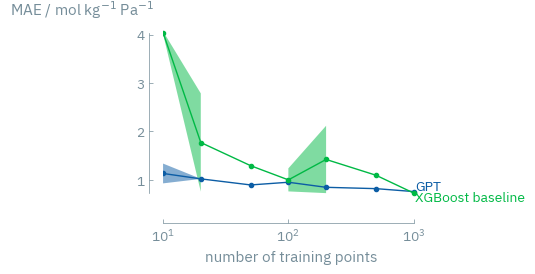

In [12]:

fig, ax = plt.subplots(1, 1)
ax.plot(
    compiled_grouped_res.loc[("logKH_CO2", "CO2 Henry coefficient"), :].index,
    compiled_grouped_res.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["mean"],
    label="GPT",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc[("logKH_CO2", "CO2 Henry coefficient"),  :].index,
    compiled_grouped_res.loc[("logKH_CO2", "CO2 Henry coefficient"),  :]["mae"]["mean"]
    - compiled_grouped_res.loc[ ("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["sem"],
    compiled_grouped_res.loc[ ("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["mean"]
    + compiled_grouped_res.loc[("logKH_CO2", "CO2 Henry coefficient"),  :]["mae"]["sem"],
    alpha=.5
)


ax.plot(
    compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :].index,
    compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["mean"],
    label="XGBoost baseline",
    marker="o",
)

ax.fill_between(
    compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :].index,
    compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["mean"] - compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["sem"],
    compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["mean"] + compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["sem"],
    alpha=0.5,
)


matplotx.line_labels()

ax.set_xlabel("number of training points", labelpad=4)
ylabel_top("MAE / mol kg$^{-1}$ Pa$^{-1}$ ", y_pad=-0.1)
ax.set_xscale('log')

#ax.set_yscale('symlog')

range_frame(
    ax, 
     compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :].index,
    compiled_gpr_grouped.loc[("logKH_CO2", "CO2 Henry coefficient"), :]["mae"]["mean"]
)




fig.savefig("co2_regression_res.pdf", bbox_inches="tight")

/Users/kevinmaikjablonka/git/kjappelbaum/plotutils/plotutils.py:11: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min - pad * (x_max - x_min), x_max + pad * (x_max - x_min))


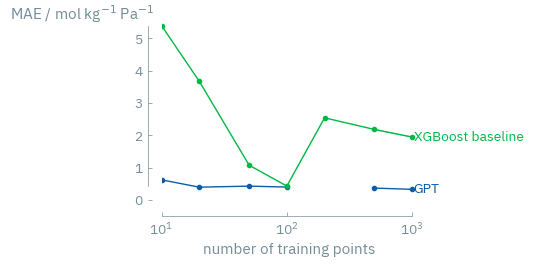

In [13]:

fig, ax = plt.subplots(1, 1)
ax.plot(
    compiled_grouped_res.loc[("logKH_CH4", "CH4 Henry coefficient"), :].index,
    compiled_grouped_res.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["mean"],
    label="GPT",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc[("logKH_CH4", "CH4 Henry coefficient"),  :].index,
    compiled_grouped_res.loc[("logKH_CH4", "CH4 Henry coefficient"),  :]["mae"]["mean"]
    - compiled_grouped_res.loc[ ("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["sem"],
    compiled_grouped_res.loc[ ("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["mean"]
    + compiled_grouped_res.loc[("logKH_CH4", "CH4 Henry coefficient"),  :]["mae"]["sem"],
    alpha=.5
)


ax.plot(
    compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :].index,
    compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["mean"],
    label="XGBoost baseline",
    marker="o",
)

ax.fill_between(
    compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :].index,
    compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["mean"] - compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["sem"],
    compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["mean"] + compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["sem"],
    alpha=0.5,
)

matplotx.line_labels()

ax.set_xlabel("number of training points", labelpad=4)
ylabel_top("MAE / mol kg$^{-1}$ Pa$^{-1}$", y_pad=-0.1)
ax.set_xscale('log')

range_frame(
    ax, 
     compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :].index,
    compiled_gpr_grouped.loc[("logKH_CH4", "CH4 Henry coefficient"), :]["mae"]["mean"]
)

fig.savefig("CH4_regression_res.pdf", bbox_inches="tight")